## EDA PROJECT

### 1. 데이터 수집 
- weekly data
- Index(지수) Data(96.07.01 ~ 20.06.29)
    - SP_Index(주식), Interm_Index(중기채), Long_Index(장기채), Commodity_Index(원자재), Gold_Index(금)
- ETF(상품) Data(06.06.26 ~ 20.06.29)
    - SPY(주식 ETF), IEF(중기채 ETF), TLT(장기채 ETF), DBC(원자재 ETF), GLD(금 ETF)

In [2]:
# Index Data 수집

sp_index = pd.read_csv("./data/S&P_Index.csv")
gold_index = pd.read_csv("./data/Gold_Index.csv")
commodity_index = pd.read_csv("./data/Commodity_Index.csv")
interm_index = pd.read_csv("./data/Intermediate_Term_Bond_Index.csv")
long_index = pd.read_csv("./data/Long_Term_Bond_Index.csv")

# ETF(상품) data 수집

spy_etf = pd.read_csv("./data/SPY.csv")
gld_etf = pd.read_csv("./data/Gld.csv")
dbc_etf = pd.read_csv("./data/DBC.csv")
ief_etf = pd.read_csv("./data/IEF.csv")
tlt_etf = pd.read_csv("./data/TLT.csv")

### 2. 데이터 전처리

In [3]:
# index df

closes_df = pd.DataFrame({'Date' : sp_index["Date"].copy(),
                          'SP_Close' : sp_index["Close"].copy(),
                          'Long_Close' : long_index["Close"].copy(),
                          'Interm_Close' : interm_index["Close"].copy(),
                          'Commodity_Close' : commodity_index["Close"].copy(),
                          'Gold_Close' : gold_index["Close"].copy()}).round(2)

closes_df = closes_df.set_index('Date')

closes_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,657.44,9.41,10.07,207.88,382
1996.7.8,646.19,9.58,10.18,210.44,384
1996.7.15,638.73,9.64,10.22,198.54,385
1996.7.22,635.90,9.60,10.19,193.01,386
1996.7.29,662.49,9.87,10.38,200.48,388
...,...,...,...,...,...
2020.6.1,3193.93,14.93,12.03,325.54,1683
2020.6.8,3041.31,15.51,12.12,314.28,1737
2020.6.15,3097.74,15.51,12.13,327.64,1753


In [4]:
closes_df.loc["1996.7.1"]

SP_Close           657.44
Long_Close           9.41
Interm_Close        10.07
Commodity_Close    207.88
Gold_Close         382.00
Name: 1996.7.1, dtype: float64

In [123]:
# 수익률 df
# for 문으로 사용해야 된다.... 

index_df = (closes_df.shift(1) - closes_df) / closes_df.shift(1)
index_df

# index_df = (closes_df - closes_df.iloc[0]) / closes_df.iloc[0] 
# index_df

,SP_Close,Long_Close,Interm_Close,Commodity_Close,Gold_Close
Date,,,,,
1996.7.1,NaN,NaN,NaN,NaN,NaN
1996.7.8,0.017112,-0.018066,-0.010924,-0.012315,-0.005236
1996.7.15,0.011545,-0.006263,-0.003929,0.056548,-0.002604
1996.7.22,0.004431,0.004149,0.002935,0.027853,-0.002597
1996.7.29,-0.041815,-0.028125,-0.018646,-0.038703,-0.005181
...,...,...,...,...,...
2020.6.1,-0.049147,0.043562,0.008244,-0.060115,0.031088
2020.6.8,0.047784,-0.038848,-0.007481,0.034589,-0.032086
2020.6.15,-0.018555,0.000000,-0.000825,-0.042510,-0.009211


#### Index 추종 포트폴리오 구성
- Portfolio_1 : 주식 100%
- Portfolio_2 : 주식 60% + 장기채 40%
- All_Weather : 주식 30% + 장기채 40% + 중기채 15% + 원자재 7.5% + 금 7.5%

### 포트폴리오 구성
- index df에 가중치를 주어 index 포트폴리오를 구성한다.
- 96.07.01일 기준 $ 1,000 를 투자한다고 가정

In [124]:
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
def get_port_return(sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight):
    return (index_df * [sp_index_weight, long_index_weight, interm_index_weight, commodity_index_weight, gold_index_weight]).sum(axis=1)
    # print(portfolio_return)
#     portfolio_return = pd.DataFrame()

In [126]:
df1 = pd.DataFrame({"Stock100%" : get_port_return(1, 0, 0, 0, 0)} )
df1.tail(2)

,Stock100%
Date,
2020.6.22,0.028631
2020.6.29,-0.040199


In [127]:
df2 = pd.DataFrame({"S6:B4" : get_port_return(0.6, 0.4, 0, 0, 0)} )
df2.tail(2)

,S6:B4
Date,
2020.6.22,0.010731
2020.6.29,-0.023104


In [128]:
df3 =pd.DataFrame({"All Weather" : get_port_return(0.3, 0.4, 0.15, 0.07, 0.075)} )
df3.head(2)

,All Weather
Date,
1996.7.1,0.000000
1996.7.8,-0.004986


In [129]:
port_df = pd.DataFrame({"Stock100%" : df1["Stock100%"], 
                        "S6:B4" : df2["S6:B4"],
                        "All Weather" : df3["All Weather"] } )
port_df.head(100)

,Stock100%,S6:B4,All Weather
Date,,,
1996.7.1,0.000000,0.000000,0.000000
1996.7.8,0.017112,0.003041,-0.004986
1996.7.15,0.011545,0.004422,0.004132
1996.7.22,0.004431,0.004318,0.005184
1996.7.29,-0.041815,-0.036339,-0.029689
...,...,...,...
1998.4.27,-0.011824,-0.007095,-0.002231
1998.5.4,0.011472,0.008390,0.006958
1998.5.11,-0.000532,-0.000319,0.000479


In [148]:
port_df.iloc[:, :3]

,Stock100%,S6:B4,All Weather
Date,,,
1996.7.1,0.000000,0.000000,0.000000
1996.7.8,0.017112,0.003041,-0.004986
1996.7.15,0.011545,0.004422,0.004132
1996.7.22,0.004431,0.004318,0.005184
1996.7.29,-0.041815,-0.036339,-0.029689
...,...,...,...
2020.6.1,-0.049147,-0.012064,0.002041
2020.6.8,0.047784,0.013131,-0.002311
2020.6.15,-0.018555,-0.011133,-0.009357


In [149]:
port_df["All Weather"].iloc[2] 

0.004131827907896074

In [136]:
port_df["win"] = 1 # 이거 왜 하는지 공부

for i in range(1253):
    if (port_df["All Weather"].iloc[i] > 0):
        port_df["win"].iloc[i] = 1
        
    elif (port_df["All Weather"].iloc[i] > port_df["S6:B4"].iloc[i])&(port_df["All Weather"].iloc[i]> port_df["Stock100%"].iloc[i]):
        port_df["win"].iloc[i] = 1    
        
    else:
        port_df["win"].iloc[i] = 0
        
port_df

,Stock100%,S6:B4,All Weather,win
Date,,,,
1996.7.1,0.000000,0.000000,0.000000,0
1996.7.8,0.017112,0.003041,-0.004986,0
1996.7.15,0.011545,0.004422,0.004132,1
1996.7.22,0.004431,0.004318,0.005184,1
1996.7.29,-0.041815,-0.036339,-0.029689,1
...,...,...,...,...
2020.6.1,-0.049147,-0.012064,0.002041,1
2020.6.8,0.047784,0.013131,-0.002311,0
2020.6.15,-0.018555,-0.011133,-0.009357,1


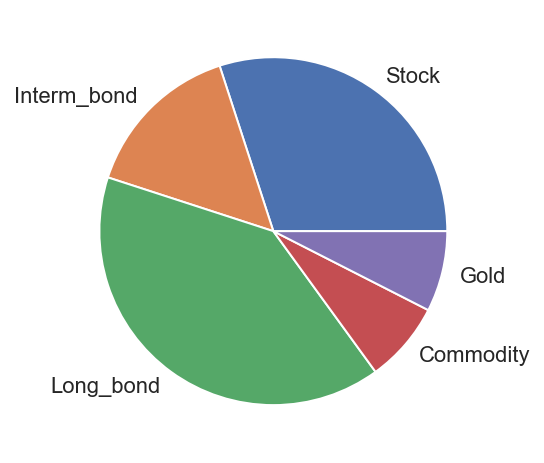

In [54]:
# 원 그래프
labels_3 = ["Stock", "Interm_bond", "Long_bond", "Commodity", "Gold"]
# ratio_2 = [60, 40]
ratio_3 = [30, 15, 40, 7.5, 7.5]

plt.pie(ratio_3, labels = labels_3)
plt.show()

### 3. 데이터 분석


In [26]:
# # (움직이는 그래프로)30년 백테스팅 추이 그래프 - 원점을 어떻게 설정할 것인가? 
# 1000으로 잡고 비율(x) 조정해서 전체에다가 곱하기로 그래프 그리기 

In [137]:
from sklearn.model_selection import train_test_split

In [151]:
X = port_df.drop(["win"], axis =1)
y = port_df["win"] 

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

np.unique(y_train, return_counts=True)

(array([0, 1]), array([259, 743]))

In [157]:
from sklearn.tree import DecisionTreeClassifier

port_df = DecisionTreeClassifier(max_depth = 5, random_state = 13)
port_df.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [158]:
from sklearn.metrics import accuracy_score

y_pred_tr = port_df.predict(X_train)
y_pred_test = port_df.predict(X_test)

print("Train : ", accuracy_score(y_train, y_pred_tr))
print("Test : ", accuracy_score(y_test, y_pred_test))

Train :  0.9900199600798403
Test :  0.9561752988047809


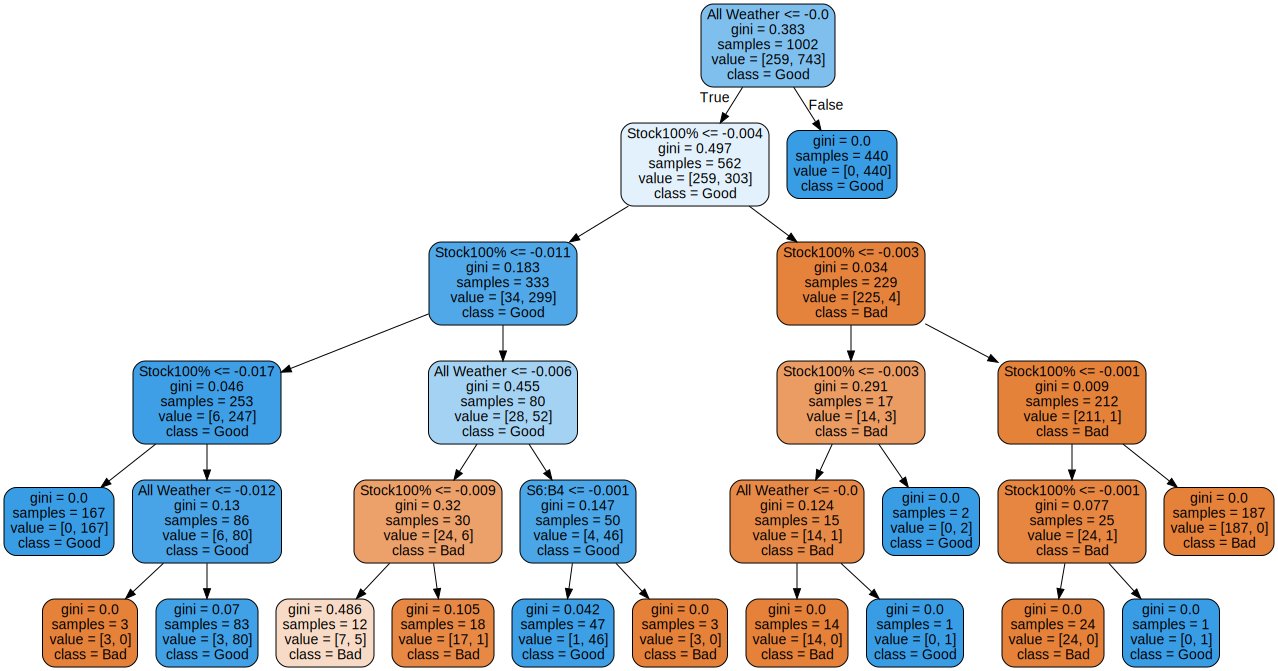

In [159]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(port_df, feature_names = X_train.columns, class_names = ["Bad", "Good"],
                      rounded = True, filled = True))

In [160]:
dict(zip(X_train.columns, port_df.feature_importances_))

{'Stock100%': 0.6285916421656161,
 'S6:B4': 0.014655244732778223,
 'All Weather': 0.3567531131016057}

In [165]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5)
port_df_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

In [166]:
for train_idx, test_idx in kfold.split(X):
    print(len(train_idx), len(test_idx))

1002 251
1002 251
1002 251
1003 250
1003 250


In [167]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    port_df_cv.fit(X_train, y_train)
    pred = port_df_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.9601593625498008, 0.9362549800796812, 0.9601593625498008, 0.952, 0.956]

In [168]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 5)
port_df_cv = DecisionTreeClassifier(max_depth = 2, random_state = 13)

cv_accuracy = []

for train_idx, test_idx in skfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    port_df_cv.fit(X_train, y_train)
    pred = port_df_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.9442231075697212, 0.9402390438247012, 0.9681274900398407, 0.952, 0.96]

In [169]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print("Accurancy : ", accuracy_score(y_test, pred))
print("Recall : ", recall_score(y_test, pred))
print("Precision : ", precision_score(y_test, pred))
print("AUC score : ", roc_auc_score(y_test, pred))
print("f1 score : ", f1_score(y_test, pred))

Accurancy :  0.96
Recall :  0.983957219251337
Precision :  0.9633507853403142
AUC score :  0.9364230540701128
f1 score :  0.9735449735449736


In [25]:
# back testing 
# train_test_spilt 로 트레인 시킬것
# 트러블 슈팅 때 질문

In [241]:
# 변동성 정의 다시 말해주기 마이너스 폭

In [242]:
# DCT

#### 1) 기대수익률 (return)

In [ ]:
# 기대 수익률, 
# https://m.blog.naver.com/PostView.nhn?blogId=anthouse28&logNo=221640874003&proxyReferer=https:%2F%2Fwww.google.com%2F





#### 2) RISK 
##### 2-1) 변동성

In [ ]:
#변동성(기대 수익률 표준편차) 분석 
# 변동성이 적으면 안정적이다 ! 라는 결론 도출

##### 2-2) 돈 잃을 가능성

In [ ]:
# 최악의 해(년단위), 최대 낙폭(주단위), mdd

In [ ]:
#  지수와 상품간 correlation 
# 마지막에 상관관계 적용해서 99% 구하기 
# 상관계수함수 쓰기

# (마지막에 신뢰도 수정)

### 4. 데이터 시각화

In [ ]:
# dataframe으로 포트폴리오 3개 비교하기 
# no, 포트폴리오명, 최초금액, 최종금액, 30년간 수익률, 최고의 해, 최악의 해, 최대 낙폭, 상관관계
# 상관관계 : 시장(s&p 500)과 포트폴리오와의 관계 -> 자산배분 잘되있다.

In [ ]:
# 상관관계 할때 hitmap 

In [ ]:
# 진짜 올웨더가 최선일까?
# 움직이는 거..
#https://m.blog.naver.com/anthouse28/221611131960

In [ ]:
# 당신은 어떤 투자 성향입니까 ?
# 공격, 중도, 안정 - 포트폴리오 퍼센트 정의 
# 입력하면, 쫙